In [1]:
import os 
import pandas as pd
import bokeh
from matplotlib import pyplot as plt
import numpy as np
#import bokeh
from holoviews import opts
#import holoviews as hv
#hv.extension('bokeh', logo=False)
import seaborn as sns

ImportError: cannot import name 'InstanceDefault' from 'bokeh.core.properties' (/home/emre/miniconda3/envs/minion/lib/python3.9/site-packages/bokeh/core/properties.py)

In [4]:
result_folder = "/home/emre/minION_results"
experiment_folder = "MinION_RBC_0902723_sup"
path = os.path.join(result_folder, experiment_folder, "demultiplex2", "barcoding_summary.txt")
overall_summary = pd.read_csv(path, sep="\t")


In [1]:
def barcode_score(summary):
    frequencies, edges = np.histogram(summary["barcode_score"], bins=100)
    return hv.Histogram((edges, frequencies), label="Barcode Score Distribution").opts(
        opts.Histogram(color="red", line_color="black", alpha=0.5, width=600, height=400, tools=['hover'], xlabel="Barcode Score", ylabel="Frequency"))
    
def barcode_barplot(summary, barcode_id = "barcode_arrangement", ylim = None):
    # Barplot of barcodes
    barcodes = summary[barcode_id].value_counts().reset_index()
    # Barplot of barcodes

    if ylim is None:
        return hv.Bars(barcodes, label="Barcode Frequency").opts(
        opts.Bars(color="red", line_color="black", alpha=0.5, width=600, height=400, tools=['hover'], xlabel="Barcode ID", ylabel="Frequency"))
    else:
        return hv.Bars(barcodes, label="Barcode Frequency").opts(
        opts.Bars(color="red", line_color="black", alpha=0.5, width=600, height=400, tools=['hover'], xlabel="Barcode ID", ylabel="Frequency", ylim=(0, 2000)))

def barcode_arrangement(summary, plot = True):
    barcode_arrangements = summary["barcode_arrangement"].value_counts().reset_index() 
    # Barplot of barcodes
    if plot:
        return hv.Bars(barcode_arrangements, label="Barcode Frequency").opts(
        opts.Bars(color="red", line_color="black", alpha=0.5, width=600, height=400, tools=['hover'], xlabel="Barcode ID", ylabel="Frequency"))
    else:
        return barcode_arrangements
    

def barcode_score_plot(summary, barcode_id = "barcode_arrangement", ylim = None):
    """
    Plot barcode score grouped by barcode arrangement
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=summary, x="barcode_score", hue=barcode_id, bins=100)
    ax.set(xlabel="Barcode Score", ylabel="Frequency")
    if ylim is not None:
        ax.set(ylim=(0, ylim))
    plt.show()





In [ ]:
import plotly.express as px

def barcode_score(summary):
    fig = px.histogram(summary, x="barcode_score", nbins=100, 
                       title="Barcode Score Distribution", labels={'barcode_score': 'Barcode Score', 'count': 'Frequency'})
    fig.update_traces(marker_color='red', marker_line_color='black', marker_line_width=1.5, opacity=0.5)
    fig.update_layout(width=600, height=400)
    return fig

def barcode_barplot(summary, barcode_id="barcode_arrangement", ylim=None):
    barcodes = summary[barcode_id].value_counts().reset_index()
    fig = px.bar(barcodes, x='barcode_arrangement', y="count", 
                 title="Barcode Frequency", labels={'index': 'Barcode ID', barcode_id: 'Frequency'})
    fig.update_traces(marker_color='red', marker_line_color='black', marker_line_width=1.5, opacity=0.5)
    fig.update_layout(width=600, height=400)

    if ylim:
        fig.update_layout(yaxis=dict(range=[0, ylim]))

    return fig

def barcode_arrangement(summary, plot=True):
    barcode_arrangements = summary["barcode_arrangement"].value_counts().reset_index()

    if plot:
        fig = px.bar(barcode_arrangements, x='barcode_score', y='barcode_arrangement', 
                     title="Barcode Frequency", labels={'index': 'Barcode ID', 'barcode_arrangement': 'Frequency'})
        fig.update_traces(marker_color='red', marker_line_color='black', marker_line_width=1.5, opacity=0.5)
        fig.update_layout(width=600, height=400)
        return fig
    else:
        return barcode_arrangements

In [ ]:
overall_summary["barcode_arrangement"].value_counts().reset_index()

In [ ]:
overall_summary[overall_summary["barcode_arrangement"] != "unclassified"]

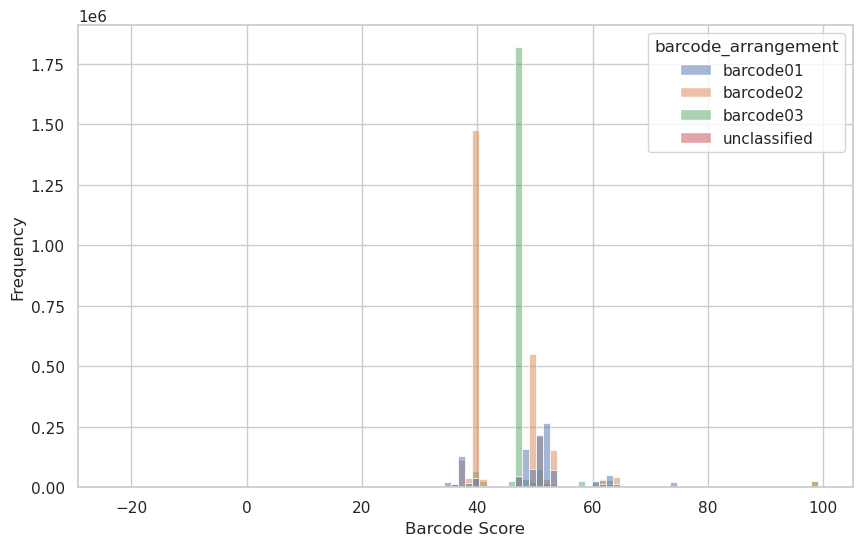

In [5]:

barcode_score_plot = barcode_score_plot(overall_summary)
#barcode_barplot_plot = barcode_barplot(overall_summary)

# Display plots side-by-side
barcode_score_plot


In [ ]:
barcode_barplot_plot = barcode_barplot(overall_summary)
barcode_barplot_plot

In [ ]:
# Front Barcode 1
result_folder = "/home/emre/minION_results"
path = os.path.join(result_folder, experiment_folder, "demultiplex", "barcode03", "barcoding_summary.txt")
summary = pd.read_csv(path, sep="\t")
#summary = summary[summary["barcode_arrangement"] != "unclassified"]
barcode_score_plot = barcode_score(summary)
barcode_barplot_plot = barcode_barplot(summary)
# Display plots side-by-side
# combined_plot = (barcode_score_plot + barcode_barplot_plot).cols(2)
# combined_plot

In [ ]:
summary["barcode_arrangement"].value_counts().reset_index()

In [ ]:
# Front Barcode 1
result_folder = "/home/emre/minION_results"
path = os.path.join(result_folder, experiment_folder, "demultiplex", "barcoding_summary.txt")
summary = pd.read_csv(path, sep="\t")
#summary = summary[summary["barcode_arrangement"] != "unclassified"]
barcode_score_plot = barcode_score(summary)
barcode_barplot_plot = barcode_barplot(summary)
# Display plots side-by-side
#combined_plot = (barcode_score_plot + barcode_barplot_plot).cols(2)
#combined_plot

In [ ]:
barcode_barplot_plot

In [ ]:
barcode_barplot_plot

In [ ]:
# Front Barcode 1
result_folder = "/home/emre/minION_results"
path = os.path.join(result_folder, experiment_folder, "demultiplex", "barcode03", "barcoding_summary.txt")
summary = pd.read_csv(path, sep="\t")
summary = summary[summary["barcode_arrangement"] != "unclassified"]
barcode_score_plot = barcode_score(summary)
barcode_barplot_plot = barcode_barplot(summary)
# Display plots side-by-side
combined_plot = (barcode_score_plot + barcode_barplot_plot).cols(2)
combined_plot

In [ ]:
import sys
sys.path.append("/home/emre/github_repo/MinION")
from minION.util.IO_processor import get_barcode_dict
from minION import analyse
import importlib
importlib.reload(analyse)
from uncertainties import ufloat 


template_fasta = "/home/emre/github_repo/MinION/minION/refseq/hetcpiii.fasta"
 
demultiplex_folder = os.path.join(result_folder, experiment_folder, "demultiplex")

barcode_dicts = get_barcode_dict(demultiplex_folder)

In [ ]:
experiment = os.path.join(result_folder, experiment_folder)
analyse.minION_summarise(experiment)


In [ ]:
variant_df = analyse.get_variant_df(demultiplex_folder, template_fasta, sequences=True)

In [ ]:
variant_df.head(20)

In [ ]:
variant_df.to_csv("/home/emre/minION_results/variant_df_Jenni.csv", index=False)


In [ ]:
variant_df[variant_df["Position"] != "NA"]

In [ ]:
len(barcode_dicts.items())

In [ ]:
for barcode_id, barcode_dict in barcode_dicts.items():
    rbc = os.path.basename(barcode_id)
    for front_barcode in barcode_dict:

        fbc = os.path.basename(front_barcode)

        fasta_file = os.path.join(front_barcode, "final_consensus.fasta")

        consensus_aligned, template = analyse.align_sequences(fasta_file, template_fasta)
    
        consensus_swapped = analyse.swap_NN(template, consensus_aligned) # Swap if quality score is higher than min threshold

        consensus_aa = analyse.translate_sequence(consensus_swapped["Sequence"])

        template_aa = analyse.translate_sequence(template)

        #dna_variants = analyse.call_variant(template, consensus_swapped["Sequence"])


        if consensus_aa["Protein-Sequence"][0] == template_aa["Protein-Sequence"][0]:
            print("No variant")

        aa_variants = analyse.call_variant(template_aa["Protein-Sequence"][0], consensus_aa["Protein-Sequence"][0])

        print(aa_variants)



In [ ]:
for barcode_id, barcode_dict in barcode_dicts.items():
    rbc = os.path.basename(barcode_id)
    for front_barcode in barcode_dict:
            
            template = analyse.get_template_sequence(template_fasta)

            fasta_file = os.path.join(front_barcode, "final_consensus.fasta")

            aa_seq = analyse.AA_seq(fasta_file, template_fasta)

            print("Barcode ID: ", os.path.basename(barcode_id), "Front Barcode: ", os.path.basename(front_barcode), "Length: ", len(aa_seq["Sequence"][0]))

            if len(aa_seq["Sequence"][0]) != len(analyse.get_template_sequence(template_fasta)):
                
                print("Barcode ID: ", os.path.basename(barcode_id), "Front Barcode: ", os.path.basename(front_barcode), "Length: ", len(aa_seq["Sequence"][0]))
                


In [ ]:
# Initialize an empty list for heatmap data
heatmap_data = []

for barcode_id, barcode_dict in barcode_dicts.items():
    print(barcode_id)
    
    # Assuming RBC is embedded in the directory name (basename)
    RBC_name = os.path.basename(barcode_id)
    
    file = os.path.join(barcode_id, "barcoding_summary.txt")
    summary = pd.read_csv(file, sep="\t")
    barcode_arrangements = barcode_arrangement(summary, plot=False)
    
    # Filter out unclassified barcode arrangements
    barcode_arrangements = barcode_arrangements[barcode_arrangements["barcode_arrangement"] != "unclassified"]
    
    for _, row in barcode_arrangements.iterrows():
        heatmap_data.append({
            "RBC": RBC_name,
            "FBC": row["barcode_arrangement"],
            "Count": row["count"]
        })

# Convert the list of dicts to a dataframe
heatmap_df = pd.DataFrame(heatmap_data)

In [ ]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColorBar, LinearColorMapper
from bokeh.transform import transform
from bokeh.layouts import column
from bokeh.models import TabPanel, Tabs
from bokeh.layouts import layout
from bokeh.io import push_notebook

def create_heatmap_for_rbc(df):
    # Define the shape of a 96-well plate
    rows, cols = 8, 12
    
    # Convert FBC to numerical values (well positions)
    df['WellNum'] = df['FBC'].str.replace("barcode", "").astype(int)
    
    # Convert well number to row and col
    df['Row'] = (df['WellNum'] - 1) // cols
    df['Col'] = (df['WellNum'] - 1) % cols
    
    # Cap values to 1000
    df['CappedCount'] = np.where(df['Count'] > 1000, 1000, df['Count'])

    # Create an empty matrix for the heatmap values
    heatmap_matrix = np.zeros((rows, cols))
    for _, row in df.iterrows():
        heatmap_matrix[row['Row'], row['Col']] = row['CappedCount']

    # Define x and y labels
    x = [str(i) for i in range(1, cols + 1)]
    y = ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']

    # Convert the matrix to a format suitable for Bokeh
    heatmap_matrix = heatmap_matrix[::-1]  # Reverse the matrix to align with Bokeh's coordinate system
    df = pd.DataFrame(heatmap_matrix, columns=x, index=y).stack().rename_axis(('y', 'x')).reset_index(name='value')
    
    # Create the Bokeh heatmap plot
    colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']
    mapper = LinearColorMapper(palette=colors, low=df.value.min(), high=df.value.max())

    p = figure(title="96-Well Plate Heatmap", x_range=x, y_range=y, width=800, height=400,
               toolbar_location=None, tools="", x_axis_label="Columns", y_axis_label="Rows")
    p.rect(x="x", y="y", width=1, height=1, source=df, fill_color=transform('value', mapper))

    color_bar = ColorBar(color_mapper=mapper, location=(0, 0))
    p.add_layout(color_bar, 'right')

    layout = column(p, sizing_mode='scale_width')  # Use the Bokeh column layout for responsive width
    output_notebook()
    show(layout)

    return p, df

# Group by RBC
grouped = heatmap_df.groupby("RBC")

# List to store all tabs
tabs = []

for rbc, group_df in grouped:
    p, df = create_heatmap_for_rbc(group_df)
    tab = TabPanel(child=p, title=rbc)
    tabs.append(tab)

# Combine all panels (tabs) into a Tabs widget
tabs_widget = Tabs(tabs=tabs)

output_notebook()
show(tabs_widget, notebook_handle=True)

In [ ]:
# Save widget as html
from bokeh.io import output_file, save
output_file("heatmap_trimmed.html")
save(tabs_widget)


In [ ]:
output_file("heatmap_tabs.html")


In [ ]:
from minION.analyse import get_variant_df, rename_barcode

In [ ]:
demultiplex_folder = os.path.join(result_folder, experiment_folder, "demultiplex")

In [ ]:
variant_df = pd.DataFrame(get_variant_df(demultiplex_folder, template_fasta, barcode_dicts))

In [ ]:
variant_df

In [ ]:
variant_df = rename_barcode(variant_df)

In [ ]:
variant_df[variant_df["Plate"] == 1]

# Swap nucleotides if the quality score is below 40

In [ ]:
from IPython.display import display, HTML
import ipywidgets as widgets

def toggle_code_cells(btn):
    display(HTML('''<script>
        code_show=!code_show;
        if (code_show) {
            $('div.input').show();
        } else {
            $('div.input').hide();
        }
        </script>
        <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>'''))

btn = widgets.Button(description="Toggle Code Cells")
btn.on_click(toggle_code_cells)
display(btn)


In [ ]:
variant_df.to_csv("/home/emre/tutorials/streamlit/variant_df.csv", index=False)

In [ ]:
df = pd.read_csv("/home/emre/minION_results/test_parallel_sup/Masked_3RBC_sup_variant_df.csv")

In [ ]:
df